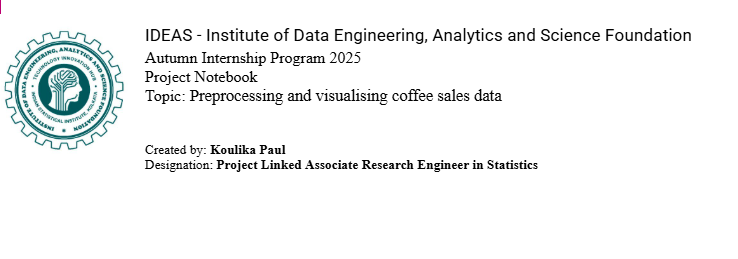

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
coffee_data=pd.read_csv("CopyofCoffe_sales.csv")
coffee_data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


**Q1. Find the number of columns, duplicate columns, and missing values**

In [ ]:
print("Number of columns:", len(coffee_data.columns))
print("Number of duplicate columns", coffee_data.duplicated().sum())
print("Number of missing values", coffee_data.isnull().sum().sum())

Number of columns: 11
Number of duplicate columns 0
Number of missing values 0


***Basic statistics of the data***

In [ ]:
coffee_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [ ]:
coffee_data.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


In [ ]:
coffee_data['Date']= pd.to_datetime(coffee_data['Date']) ## converting the object datatype to datetime
coffee_data['Month']=coffee_data['Date'].dt.month
coffee_data['Year']=(coffee_data['Date'].dt.year).astype('int')

***Average money for each year***

In [ ]:
grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)
grouped_data

/tmp/ipython-input-3058338727.py:1: FutureWarning: The provided callable <function mean at 0x7f726ab709a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)


,money
Year,
2024,31.737634
2025,31.390011


**Q2. Find the datatype of grouped_data**

In [ ]:
print(type(grouped_data))

<class 'pandas.core.series.Series'>


**Q3. Find the maximum money for each month**

In [ ]:
group_data=coffee_data.groupby('Month')['money'].max()
group_data

,money
Month,
1,35.76
2,35.76
3,38.70
4,38.70
5,37.72
6,37.72
7,37.72
8,32.82
9,35.76


***Distribution of money over months***

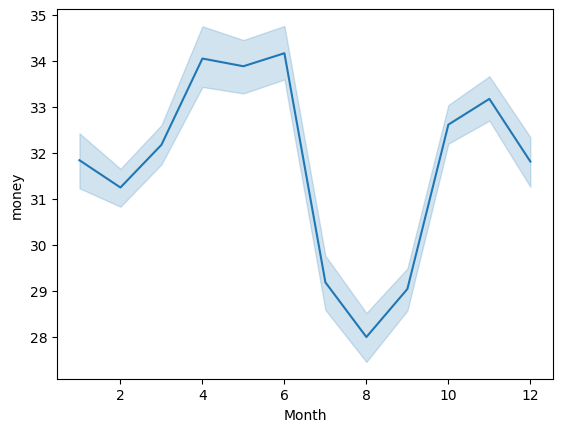

In [ ]:
sns.lineplot(x=coffee_data['Month'],y='money',data=coffee_data)
plt.show()

***The density of money over years***

<Axes: xlabel='Year', ylabel='money'>

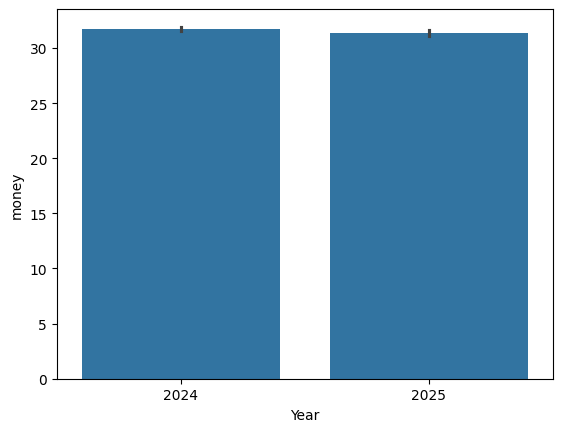

In [ ]:
sns.barplot(data= coffee_data,x='Year',y= coffee_data['money'])


**Q4. Find the distribution of money over coffee names**


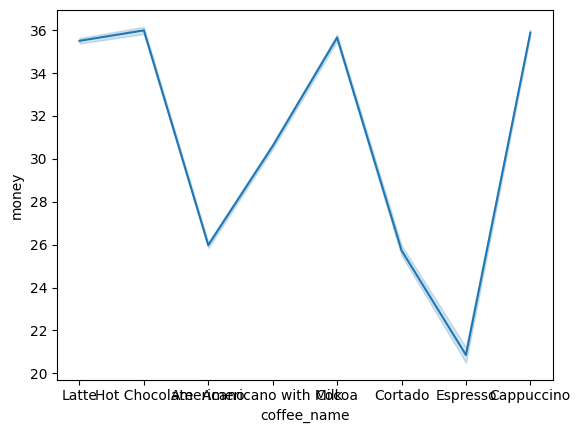

In [ ]:
sns.lineplot(data=coffee_data,x='coffee_name', y='money')
plt.show()

***Times of the Day the dataset holds***

In [ ]:
coffee_data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Afternoon,1205
Morning,1181
Night,1161


**Q5. How many types of coffees are present in the dataset?**

In [ ]:
num_coffee_types = coffee_data['coffee_name'].nunique()
print(f"Number of types of coffees: {num_coffee_types}")
print(coffee_data['coffee_name'].unique())

Number of types of coffees: 8
['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


***Max money from coffee_name***

In [ ]:
coffee_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
Americano,28.9
Americano with Milk,33.8
Cappuccino,38.7
Cocoa,38.7
Cortado,28.9
Espresso,24.0
Hot Chocolate,38.7
Latte,38.7


**Q6. Find the average money made at what time of the day.**

In [ ]:
coffee_data.groupby('Time_of_Day')['money'].agg(np.mean)

/tmp/ipython-input-1435327562.py:1: FutureWarning: The provided callable <function mean at 0x7f726ab709a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  coffee_data.groupby('Time_of_Day')['money'].agg(np.mean)


,money
Time_of_Day,
Afternoon,31.643187
Morning,30.422693
Night,32.890904


***Generate 100 synthetic data rows***

In [ ]:

date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.cumsum(np.random.randn(100))
df = pd.DataFrame({"date": date_range, "value": values})
df

,date,value
0,2023-01-01,-1.088363
1,2023-01-02,-2.601347
2,2023-01-03,-3.234371
3,2023-01-04,-2.712826
4,2023-01-05,-4.850106
...,...,...
95,2023-04-06,4.680094
96,2023-04-07,4.906880
97,2023-04-08,5.289347
98,2023-04-09,5.641570


**Q7. Insert synthetic data into the given data set and analyse as above.**

In [ ]:
print("Number of columns in coffee_data:", len(coffee_data.columns))
print("Number of columns in df:", len(df.columns))
common_columns=list(set(coffee_data.columns).intersection(set(df.columns)))
new_coffee_data = pd.concat([coffee_data[common_columns], df[common_columns]], ignore_index=True)
df = df[coffee_data.columns]

df, coffee_data = df.align(coffee_data, join='outer', axis=1)

new_coffee_data = pd.concat([coffee_data, df], ignore_index=True)

print(new_coffee_data)

Number of columns in coffee_data: 15
Number of columns in df: 15
     hour_of_day cash_type  money    coffee_name Time_of_Day Weekday  \
0             10      card   38.7          Latte     Morning     Fri   
1             12      card   38.7  Hot Chocolate   Afternoon     Fri   
2             12      card   38.7  Hot Chocolate   Afternoon     Fri   
3             13      card   28.9      Americano   Afternoon     Fri   
4             13      card   38.7          Latte   Afternoon     Fri   
...          ...       ...    ...            ...         ...     ...   
3642        <NA>       NaN    NaN            NaN         NaN     NaN   
3643        <NA>       NaN    NaN            NaN         NaN     NaN   
3644        <NA>       NaN    NaN            NaN         NaN     NaN   
3645        <NA>       NaN    NaN            NaN         NaN     NaN   
3646        <NA>       NaN    NaN            NaN         NaN     NaN   

     Month_name Weekdaysort Monthsort       Date             Time Mont

/tmp/ipython-input-3484349780.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_coffee_data = pd.concat([coffee_data[common_columns], df[common_columns]], ignore_index=True)
/tmp/ipython-input-3484349780.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_coffee_data = pd.concat([coffee_data, df], ignore_index=True)
